In [33]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate Different Initial Distributions of Interest

- Uniform
- Gaussian
- Stretched along 1 or 2 dimensions

In [34]:
def uniform_initial(n):
    x = np.random.uniform(-1, 1, n)
    y = np.random.uniform(-1, 1, n)
    z = np.random.uniform(-1, 1, n)
    return x, y, z

def normal_initial(n):
    x = np.random.normal(size=n)
    y = np.random.normal(size=n)
    z = np.random.normal(size=n)
    return x, y, z

def rectangular_initial(n):
    x = np.random.uniform(-1, 1, n)
    y = np.random.uniform(-1, 1, n)
    z = np.random.uniform(-5, 5, n)
    return x, y, z

In [35]:
def plot_3d(x,y,z):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(
        x,y,z,
        s=5,              # marker size
        alpha=0.6,
        # cmap='viridis',
        linewidths=0,     # no edge lines, cleaner look
    )

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Particle Distribution')

    max_range = np.ptp(np.column_stack((x,y,z)), axis=0).max() / 2  # ptp = peak to peak (max - min)
    mid = np.mean(np.column_stack((x,y,z)), axis=0)
    ax.set_xlim(mid[0] - max_range, mid[0] + max_range)
    ax.set_ylim(mid[1] - max_range, mid[1] + max_range)
    ax.set_zlim(mid[2] - max_range, mid[2] + max_range)

    plt.tight_layout()
    plt.show()

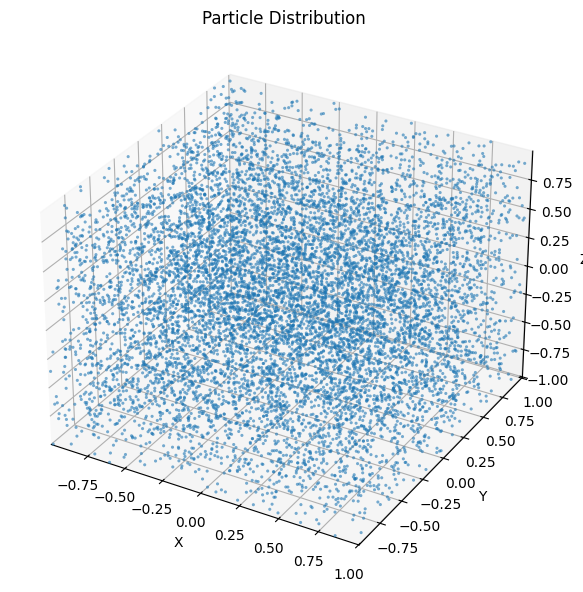

In [36]:
x,y,z = uniform_initial(10000)
plot_3d(x,y,z)

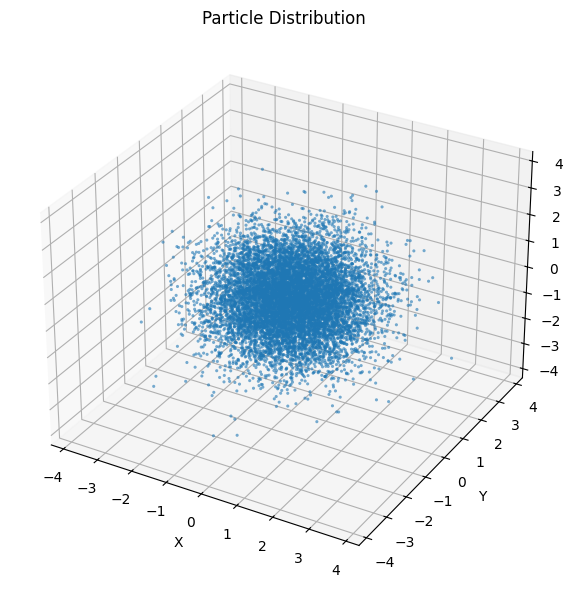

In [37]:
x,y,z = normal_initial(10000)
plot_3d(x,y,z)

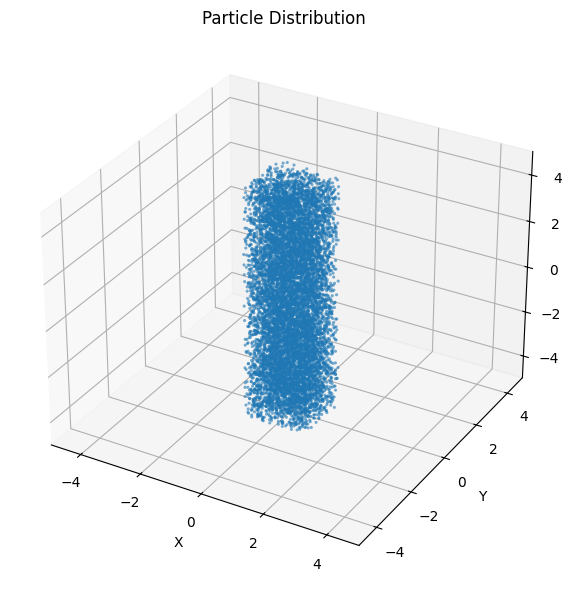

In [38]:
x,y,z = rectangular_initial(10000)
plot_3d(x,y,z)

### Generate Purturbations to Particles

In [39]:
def perturb(sz,scale):
    x = np.random.uniform(low=-scale, high=scale, size=sz)
    y = np.random.uniform(low=-scale, high=scale, size=sz)
    z = np.random.uniform(low=-scale, high=scale, size=sz)
    return x, y, z

In [40]:
def plot_perturbations(ix,iy,iz,px,py,pz):
    fig = plt.figure(figsize=(12, 6))

    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(ix, iy, iz, s=5, alpha=0.6)
    ax1.set_title('Initial Distribution')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')

    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(px, py, pz, s=5, alpha=0.6)
    ax2.set_title('Perturbed Distribution')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')

    plt.tight_layout()
    plt.show()

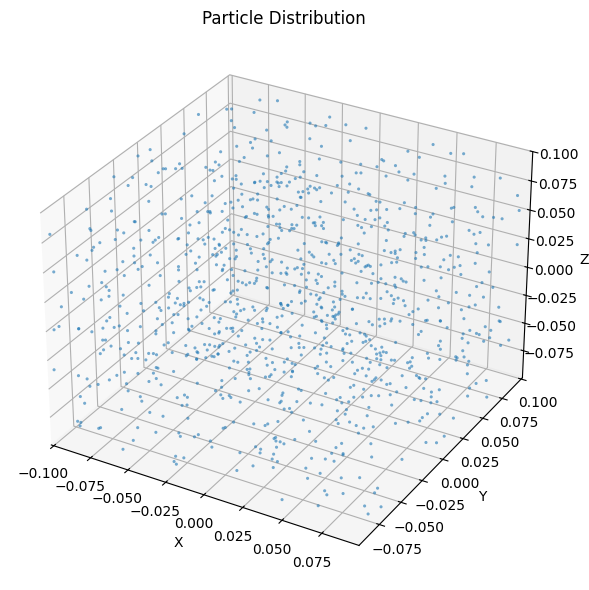

In [41]:
ix,iy,iz = uniform_initial(1000)
px,py,pz = perturb(len(ix),0.1)
plot_3d(px,py,pz)

### Save Distributions to HDF5

In [42]:
f = h5.File('particles.h5', 'w')

names = ["test"]
dist = [uniform_initial(1000)]
perturb = [perturb(len(dist[0][0]), 0.1)]

for name, (ix,iy,iz), (px,py,pz) in zip(names, dist, perturb):
    g = f.create_group(name)
    g.create_dataset("ix", data=ix)
    g.create_dataset("iy", data=iy)
    g.create_dataset("iz", data=iz)
    g.create_dataset("px", data=px)
    g.create_dataset("py", data=py)
    g.create_dataset("pz", data=pz)

f.close()